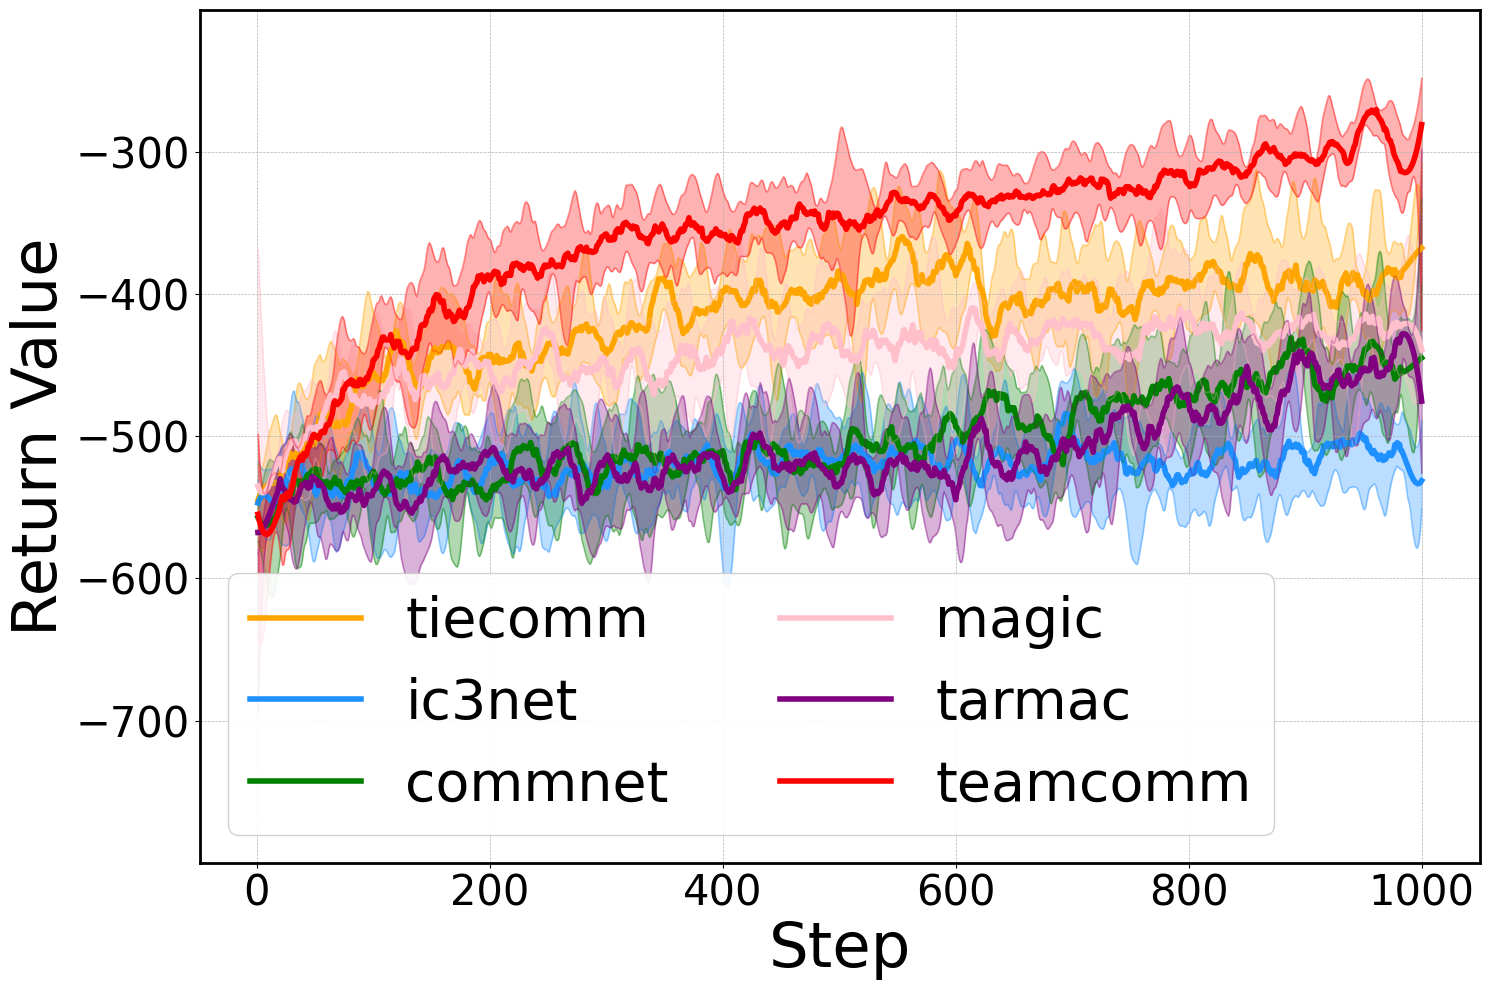

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema, savgol_filter
from scipy.interpolate import interp1d

# Read the uploaded CSV file
df = pd.read_csv('mpe333.csv')

# Filtering columns that contain "episode_return" and ignoring those with "MIN" or "MAX"
selected_columns = [col for col in df.columns if "episode_return" in col and "__MIN" not in col and "__MAX" not in col]

# Selecting the first 6 columns from the filtered list
selected_columns = selected_columns[:6]

# Extracting the data for the selected columns
selected_data = df[selected_columns]
x = df['epoch']

# Define the smoothing and bound calculation function
def compute_smoothed_bounds(data, x, window_size_bounds, poly_order):
    upper_idx = argrelextrema(data.to_numpy(), np.greater)[0]
    lower_idx = argrelextrema(data.to_numpy(), np.less)[0]
    
    upper_points_x = x.iloc[upper_idx]
    upper_points_y = data.iloc[upper_idx]
    lower_points_x = x.iloc[lower_idx]
    lower_points_y = data.iloc[lower_idx]
    
    upper_interp = interp1d(upper_points_x, upper_points_y, kind='linear', fill_value='extrapolate')
    lower_interp = interp1d(lower_points_x, lower_points_y, kind='linear', fill_value='extrapolate')
    
    upper_bound = upper_interp(x)
    lower_bound = lower_interp(x)
    
    smoothed_upper_bound = savgol_filter(upper_bound, window_size_bounds, poly_order)
    smoothed_lower_bound = savgol_filter(lower_bound, window_size_bounds, poly_order)
    
    return smoothed_upper_bound, smoothed_lower_bound

# Define parameters for smoothing
window_size_data = 35
window_size_bounds = 21  # Adjusted to ensure it's odd
poly_order = 3

# Initialize plot with enhanced aesthetics
plt.figure(figsize=(15, 10))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
cu = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(cu)
ax.spines['left'].set_linewidth(cu)
ax.spines['right'].set_linewidth(cu)
ax.spines['top'].set_linewidth(cu)

# Adjusted distinct colors
distinct_colors = ['orange', 'dodgerblue', 'green', 'pink', 'purple', 'red']
custom_names = ["tiecomm", "ic3net", "commnet", "magic", "tarmac","teamcomm"]

# Process and plot each of the six data columns
for idx, column in enumerate(selected_columns):
    data = selected_data[column].dropna()  # Removing NaN values
    x_data = x[:len(data)]
    
    smoothed_upper_bound, smoothed_lower_bound = compute_smoothed_bounds(data, x_data, window_size_bounds, poly_order)
    smoothed_data = savgol_filter(data, window_size_data, poly_order)
    
    # Plotting bounds
    plt.plot(x_data, smoothed_upper_bound, color=distinct_colors[idx], linewidth=1, alpha=0.3)
    plt.plot(x_data, smoothed_lower_bound, color=distinct_colors[idx], linewidth=1, alpha=0.3)
    
    # Filling between bounds
    plt.fill_between(x_data, smoothed_upper_bound, smoothed_lower_bound, color=distinct_colors[idx], alpha=0.3)
    
    # Plotting smoothed data
    plt.plot(x_data, smoothed_data, label=custom_names[idx], color=distinct_colors[idx], linewidth=4)  # Using only the first part of the column name for brevity

# Customize and show plot
plt.legend(loc='lower left', fontsize=40, framealpha=0.9, ncol=2)
plt.xlabel('Step', fontsize=45)
plt.ylabel('Return Value', fontsize=45)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(bottom=-800)
yticks = np.arange(-700, plt.gca().get_ylim()[1] + 100, 100)
plt.yticks(yticks, fontsize=30)
if len(yticks) > 1:
    plt.yticks(yticks[:-1], fontsize=30)
plt.tight_layout()
plt.show()

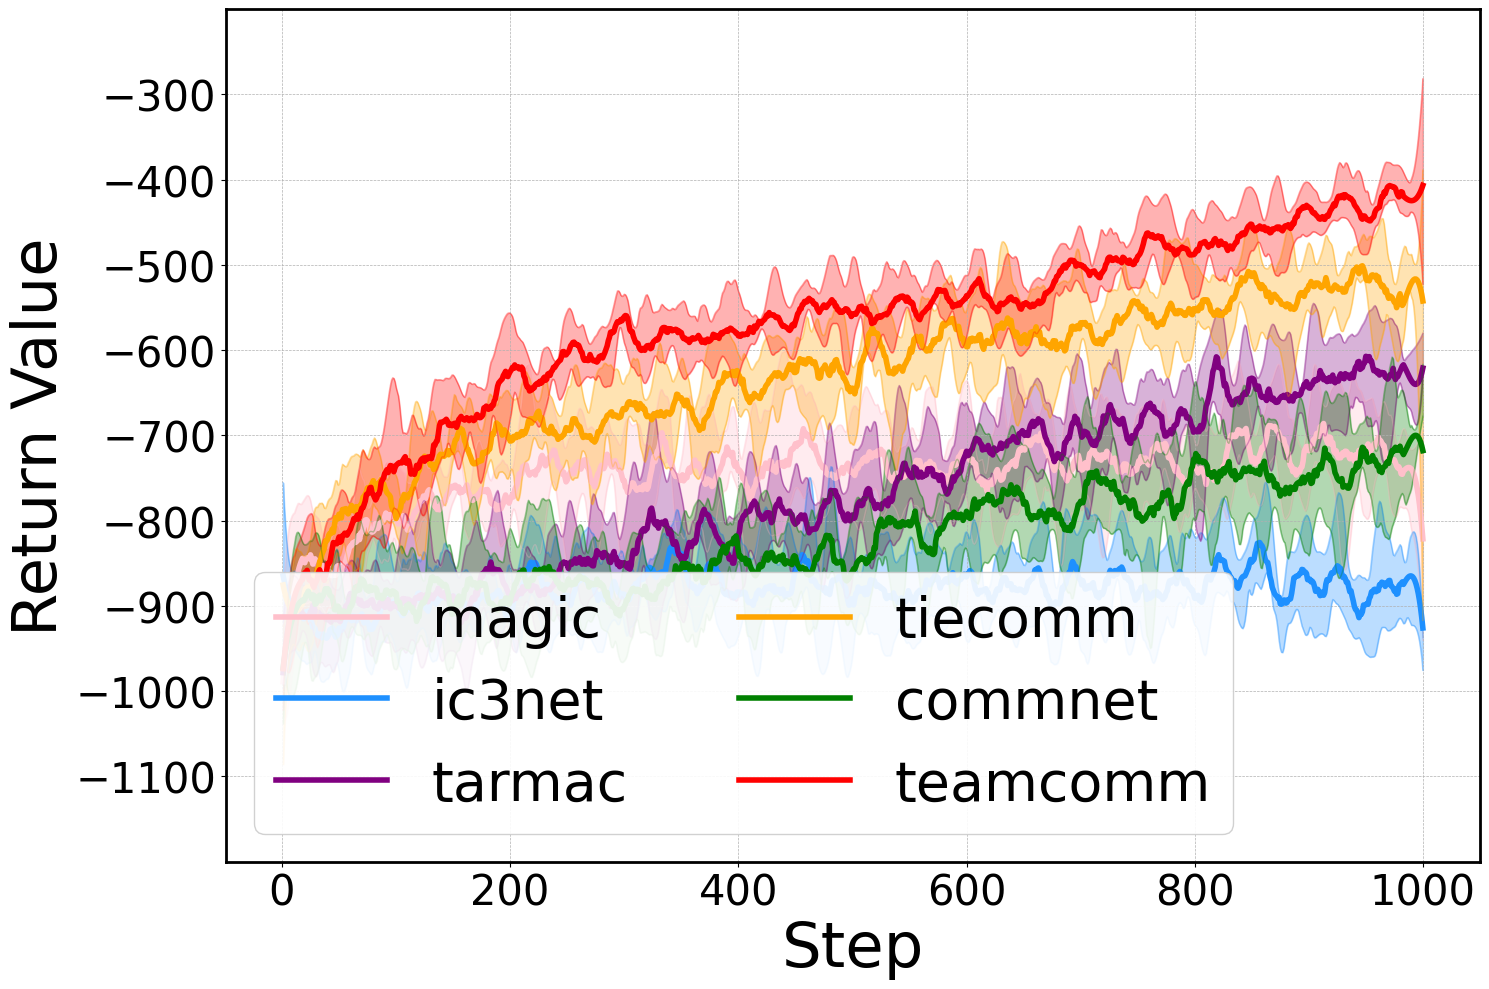

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema, savgol_filter
from scipy.interpolate import interp1d

# Read the uploaded CSV file
df = pd.read_csv('mpe555.csv')

# Filtering columns that contain "episode_return" and ignoring those with "MIN" or "MAX"
selected_columns = [col for col in df.columns if "episode_return" in col and "__MIN" not in col and "__MAX" not in col]

# Selecting the first 6 columns from the filtered list
selected_columns = selected_columns[:6]

# Extracting the data for the selected columns
selected_data = df[selected_columns]
x = df['epoch']

# Define the smoothing and bound calculation function
def compute_smoothed_bounds(data, x, window_size_bounds, poly_order):
    upper_idx = argrelextrema(data.to_numpy(), np.greater)[0]
    lower_idx = argrelextrema(data.to_numpy(), np.less)[0]
    
    upper_points_x = x.iloc[upper_idx]
    upper_points_y = data.iloc[upper_idx]
    lower_points_x = x.iloc[lower_idx]
    lower_points_y = data.iloc[lower_idx]
    
    upper_interp = interp1d(upper_points_x, upper_points_y, kind='linear', fill_value='extrapolate')
    lower_interp = interp1d(lower_points_x, lower_points_y, kind='linear', fill_value='extrapolate')
    
    upper_bound = upper_interp(x)
    lower_bound = lower_interp(x)
    
    smoothed_upper_bound = savgol_filter(upper_bound, window_size_bounds, poly_order)
    smoothed_lower_bound = savgol_filter(lower_bound, window_size_bounds, poly_order)
    
    return smoothed_upper_bound, smoothed_lower_bound

# Define parameters for smoothing
window_size_data = 35
window_size_bounds = 21  # Adjusted to ensure it's odd
poly_order = 3

# Initialize plot with enhanced aesthetics
plt.figure(figsize=(15, 10))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
cu = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(cu)
ax.spines['left'].set_linewidth(cu)
ax.spines['right'].set_linewidth(cu)
ax.spines['top'].set_linewidth(cu)


# Adjusted distinct colors


distinct_colors = ['pink','dodgerblue','purple','orange','green','red']
custom_names = ["magic", "ic3net","tarmac","tiecomm","commnet","teamcomm"]

# Process and plot each of the six data columns
for idx, column in enumerate(selected_columns):
    data = selected_data[column].dropna()  # Removing NaN values
    x_data = x[:len(data)]
    
    smoothed_upper_bound, smoothed_lower_bound = compute_smoothed_bounds(data, x_data, window_size_bounds, poly_order)
    smoothed_data = savgol_filter(data, window_size_data, poly_order)
    
    # Plotting bounds
    plt.plot(x_data, smoothed_upper_bound, color=distinct_colors[idx], linewidth=1, alpha=0.3)
    plt.plot(x_data, smoothed_lower_bound, color=distinct_colors[idx], linewidth=1, alpha=0.3)
    
    # Filling between bounds
    plt.fill_between(x_data, smoothed_upper_bound, smoothed_lower_bound, color=distinct_colors[idx], alpha=0.3)
    
    # Plotting smoothed data
    plt.plot(x_data, smoothed_data, label=custom_names[idx], color=distinct_colors[idx], linewidth=4)  # Using only the first part of the column name for brevity

# Customize and show plot
plt.legend(loc='lower left', fontsize=40, framealpha=0.9, ncol=2)
plt.xlabel('Step', fontsize=45)
plt.ylabel('Return Value', fontsize=45)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(bottom=-1200)
yticks = np.arange(-1100, plt.gca().get_ylim()[1] + 100, 100)
plt.yticks(yticks, fontsize=30)
if len(yticks) > 1:
    plt.yticks(yticks[:-1], fontsize=30)
plt.tight_layout()
plt.show()

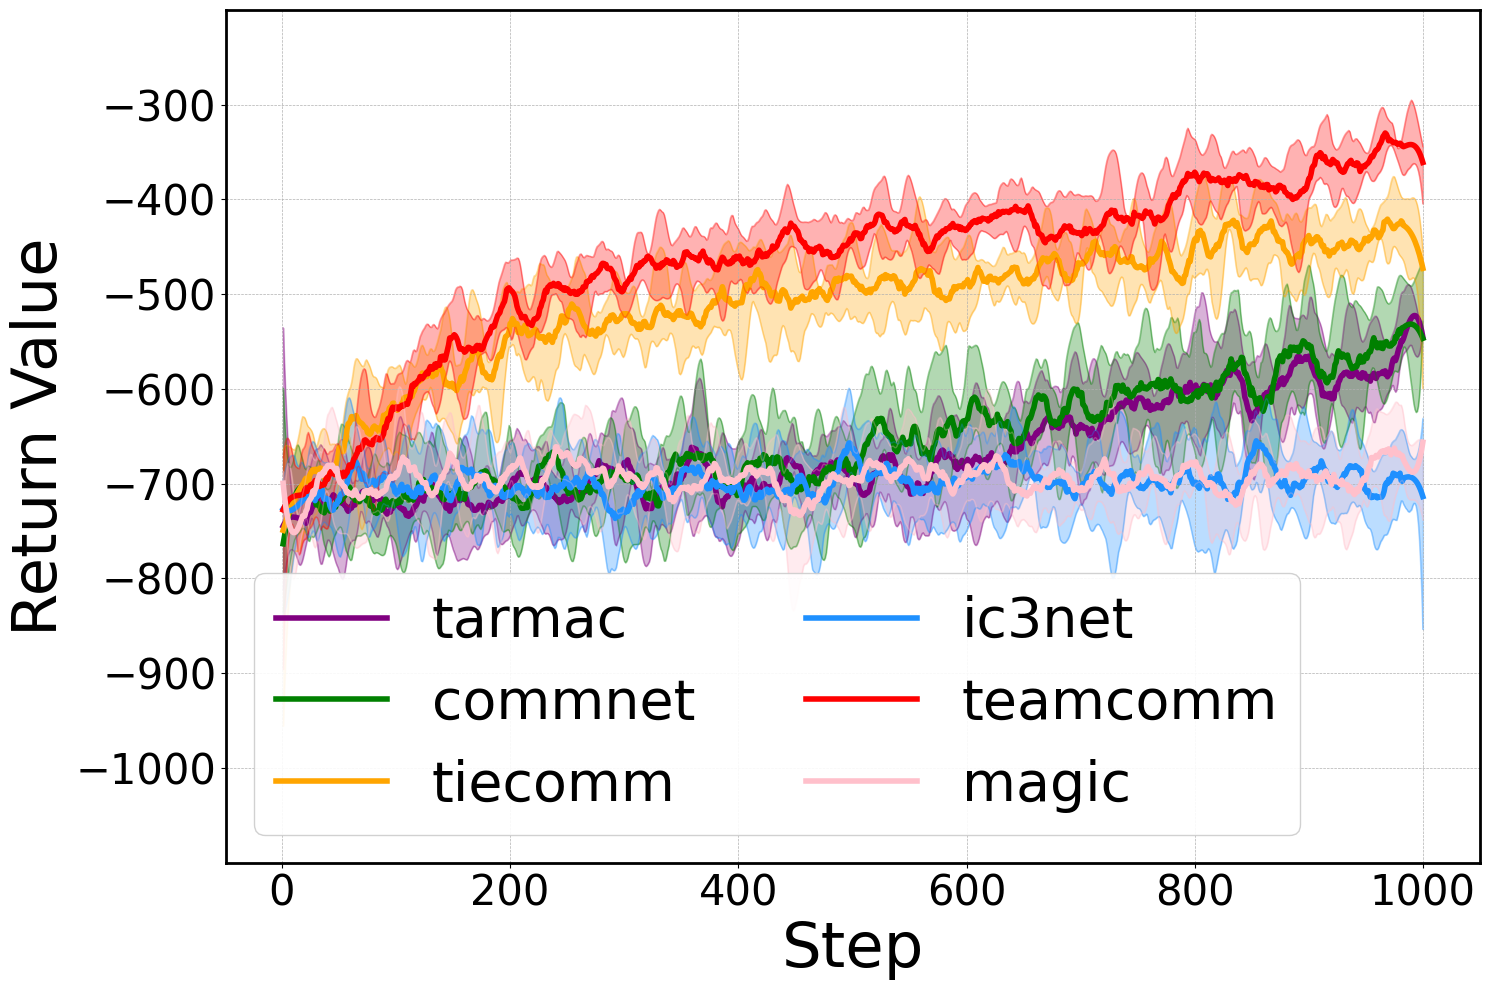

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema, savgol_filter
from scipy.interpolate import interp1d

# Read the uploaded CSV file
df = pd.read_csv('mpe345.csv')

# Filtering columns that contain "episode_return" and ignoring those with "MIN" or "MAX"
selected_columns = [col for col in df.columns if "episode_return" in col and "__MIN" not in col and "__MAX" not in col]

# Selecting the first 6 columns from the filtered list
selected_columns = selected_columns[:6]

# Extracting the data for the selected columns
selected_data = df[selected_columns]
x = df['epoch']

# Define the smoothing and bound calculation function
def compute_smoothed_bounds(data, x, window_size_bounds, poly_order):
    upper_idx = argrelextrema(data.to_numpy(), np.greater)[0]
    lower_idx = argrelextrema(data.to_numpy(), np.less)[0]
    
    upper_points_x = x.iloc[upper_idx]
    upper_points_y = data.iloc[upper_idx]
    lower_points_x = x.iloc[lower_idx]
    lower_points_y = data.iloc[lower_idx]
    
    upper_interp = interp1d(upper_points_x, upper_points_y, kind='linear', fill_value='extrapolate')
    lower_interp = interp1d(lower_points_x, lower_points_y, kind='linear', fill_value='extrapolate')
    
    upper_bound = upper_interp(x)
    lower_bound = lower_interp(x)
    
    smoothed_upper_bound = savgol_filter(upper_bound, window_size_bounds, poly_order)
    smoothed_lower_bound = savgol_filter(lower_bound, window_size_bounds, poly_order)
    
    return smoothed_upper_bound, smoothed_lower_bound

# Define parameters for smoothing
window_size_data = 35
window_size_bounds = 21  # Adjusted to ensure it's odd
poly_order = 3

# Initialize plot with enhanced aesthetics
plt.figure(figsize=(15, 10))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
cu = 2
ax = plt.gca()
ax.spines['bottom'].set_linewidth(cu)
ax.spines['left'].set_linewidth(cu)
ax.spines['right'].set_linewidth(cu)
ax.spines['top'].set_linewidth(cu)


# Adjusted distinct colors

distinct_colors = ['purple','green','orange','dodgerblue','red','pink']
custom_names = ["tarmac","commnet","tiecomm","ic3net","teamcomm","magic"]

# Process and plot each of the six data columns
for idx, column in enumerate(selected_columns):
    data = selected_data[column].dropna()  # Removing NaN values
    x_data = x[:len(data)]
    
    smoothed_upper_bound, smoothed_lower_bound = compute_smoothed_bounds(data, x_data, window_size_bounds, poly_order)
    smoothed_data = savgol_filter(data, window_size_data, poly_order)
    
    # Plotting bounds
    plt.plot(x_data, smoothed_upper_bound, color=distinct_colors[idx], linewidth=1, alpha=0.3)
    plt.plot(x_data, smoothed_lower_bound, color=distinct_colors[idx], linewidth=1, alpha=0.3)
    
    # Filling between bounds
    plt.fill_between(x_data, smoothed_upper_bound, smoothed_lower_bound, color=distinct_colors[idx], alpha=0.3)
    
    # Plotting smoothed data
    plt.plot(x_data, smoothed_data, label=custom_names[idx], color=distinct_colors[idx], linewidth=4)  # Using only the first part of the column name for brevity

# Customize and show plot
plt.legend(loc='lower left', fontsize=40, framealpha=0.9, ncol=2)
plt.xlabel('Step', fontsize=45)
plt.ylabel('Return Value', fontsize=45)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.ylim(bottom=-1100)
yticks = np.arange(-1000, plt.gca().get_ylim()[1] + 100, 100)
plt.yticks(yticks, fontsize=30)
if len(yticks) > 1:
    plt.yticks(yticks[:-1], fontsize=30)
plt.tight_layout()
plt.show()